<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/03_1_k_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%run my_init.py

Mounted at /content/drive


In [2]:
%matplotlib inline

#농어 무게 예측하기

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

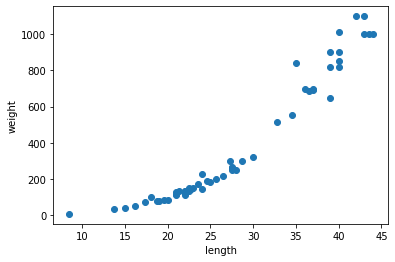

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 비선형 관계(예측)
# 무게 = y절편 + w*길이 / w=가중치=기울기

In [5]:
# train_test_split -> feature(X) + target(y)
#                     X_train, X_test, y_train, y_test

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42) #seed 고정
train_input.shape, train_input.shape #2차원 배열이 아님 튜플임

((42,), (42,))

In [6]:
# 훈련 세트는 무조건 2차원 배열(행렬)이어야 한다
# X_train => 2D / X_test => 2D
train_input = train_input.reshape(-1,1) #(-1,1) = (행,열) 즉, 1X3 1차원 행렬을 3X1 2차원 배열로 만드는 것(행은 상관없고 열이 1개인 2차원 배열)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [7]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target) 
knr.score(test_input, test_target)
# score = 결정계수 0.992809406101064 = r2_score
# 전체에서 0.7%정도 예측하지 못하고, 99.3%정도는 예측 가능하다

0.992809406101064

In [8]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(test_target, knr.predict(test_input)) #결정계수 출력

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
mse = mean_squared_error(test_target, test_prediction)
rmse = mse**0.5

print(f"r2:{r2}, MAE:{mae}, MSE:{mse}, RMSE:{rmse}") #즉, 예측값이 평균적으로 19g정도 타깃값과 다르다

r2:0.992809406101064, MAE:19.157142857142862, MSE:721.7385714285714, RMSE:26.865192562655704


# 과대적합 VS 과소적합
overfit VS underfit  
- overfit : 너무 많은 학습이 일어남  
- underfit : 더 많은 학습이 필요함

In [9]:
knr.score(train_input, train_target)  #훈련 점수

0.9698823289099254

In [10]:
knr.score(test_input, test_target)  #평가 점수
#훈련점수 < 평가점수 => underfit 현재 과소적합이 일어난 상태임
# underfit, overfit가 아닌 상태에서 가장 점수가 높은 best model을 위해 다양한 방법을 써가면서 오차를 줄여보는 것
# 가장 중요한 것은 test score!
# 그리고 일반화 성능(generalization performance)이 좋은 것을 찾아야 함! - 훈련이 아닌 현장에서 제대로 실력 발휘를 해야 함

0.992809406101064

In [12]:
# 과소적합을 해결해보자

# k는 대표적인 hyper-parameter(학습에 의해 생성되는 값) - 사람에 의해 통제, 제어됨
knr.n_neighbors = 3  # fitted value(이웃 개수)
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target), knr.score(test_input, test_target)) # 훈련 > 테스트

# 해당 점수 차이가 크진 않음 -> 과대적합은 아님

# 이웃의 개수가 클수록 과소적합 / 작을수록 과대적합

0.9804899950518966 0.9746459963987609


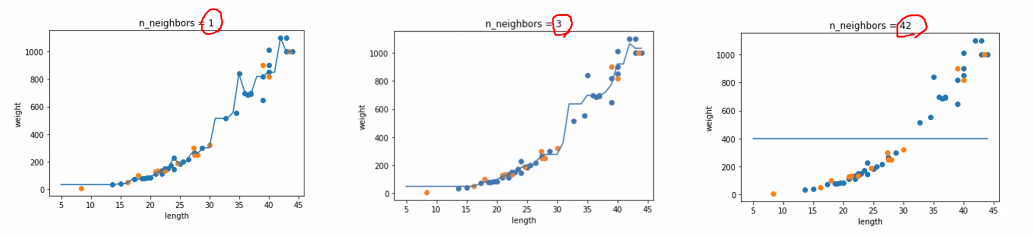

1. 과대 적합  
2. 일반  
3. 과소 적합